In [20]:
import pandas as pd
import matplotlib.pyplot as plt


import nltk
from nltk import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/damenac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data_raw = pd.read_excel('./data/textos.xlsx')
data_raw

,textos,ODS
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,No dejar clara la naturaleza de estos riesgos ...,6
2,"Como resultado, un mayor y mejorado acceso al ...",13
3,Con el Congreso firmemente en control de la ju...,16
4,"Luego, dos secciones finales analizan las impl...",5
...,...,...
9651,Esto implica que el tiempo de las mujeres en e...,5
9652,"Sin embargo, estas fallas del mercado implican...",3
9653,El hecho de hacerlo y cómo hacerlo dependerá e...,9
9654,"Esto se destacó en el primer estudio de caso, ...",6


In [3]:
data_raw.describe()

,ODS
count,9656.000000
mean,7.993993
std,4.692995
min,1.000000
25%,4.000000
50%,7.000000
75%,12.000000
max,16.000000


In [5]:
data_raw.duplicated().sum()

0

In [4]:
data_raw.isna().sum()

textos    0
ODS       0
dtype: int64

### Procesamiento de texto

In [7]:
tokenized = data_raw["textos"].apply(lambda x: word_tokenize(x))
tokenized

0       [``, Aprendizaje, '', y, ``, educación, '', se...
1       [No, dejar, clara, la, naturaleza, de, estos, ...
2       [Como, resultado, ,, un, mayor, y, mejorado, a...
3       [Con, el, Congreso, firmemente, en, control, d...
4       [Luego, ,, dos, secciones, finales, analizan, ...
                              ...                        
9651    [Esto, implica, que, el, tiempo, de, las, muje...
9652    [Sin, embargo, ,, estas, fallas, del, mercado,...
9653    [El, hecho, de, hacerlo, y, cómo, hacerlo, dep...
9654    [Esto, se, destacó, en, el, primer, estudio, d...
9655    [Aunque, existen, programas, para, convertirse...
Name: textos, Length: 9656, dtype: object

In [13]:
tokenizer = RegexpTokenizer(r'\w+')
tokenized_no_punct = data_raw["textos"].apply(lambda x: tokenizer.tokenize(x))
tokenized_no_punct

0       [Aprendizaje, y, educación, se, consideran, si...
1       [No, dejar, clara, la, naturaleza, de, estos, ...
2       [Como, resultado, un, mayor, y, mejorado, acce...
3       [Con, el, Congreso, firmemente, en, control, d...
4       [Luego, dos, secciones, finales, analizan, las...
                              ...                        
9651    [Esto, implica, que, el, tiempo, de, las, muje...
9652    [Sin, embargo, estas, fallas, del, mercado, im...
9653    [El, hecho, de, hacerlo, y, cómo, hacerlo, dep...
9654    [Esto, se, destacó, en, el, primer, estudio, d...
9655    [Aunque, existen, programas, para, convertirse...
Name: textos, Length: 9656, dtype: object

In [15]:
nltk_stopwords = stopwords.words("spanish")
no_stopwords = tokenized_no_punct.apply(lambda x: [token for token in x if token not in nltk_stopwords])
no_stopwords

0       [Aprendizaje, educación, consideran, sinónimos...
1       [No, dejar, clara, naturaleza, riesgos, puede,...
2       [Como, resultado, mayor, mejorado, acceso, agu...
3       [Con, Congreso, firmemente, control, jurisdicc...
4       [Luego, dos, secciones, finales, analizan, imp...
                              ...                        
9651    [Esto, implica, tiempo, mujeres, mercado, labo...
9652    [Sin, embargo, fallas, mercado, implican, comp...
9653    [El, hecho, hacerlo, cómo, hacerlo, dependerá,...
9654    [Esto, destacó, primer, estudio, caso, marco, ...
9655    [Aunque, existen, programas, convertirse, espe...
Name: textos, Length: 9656, dtype: object

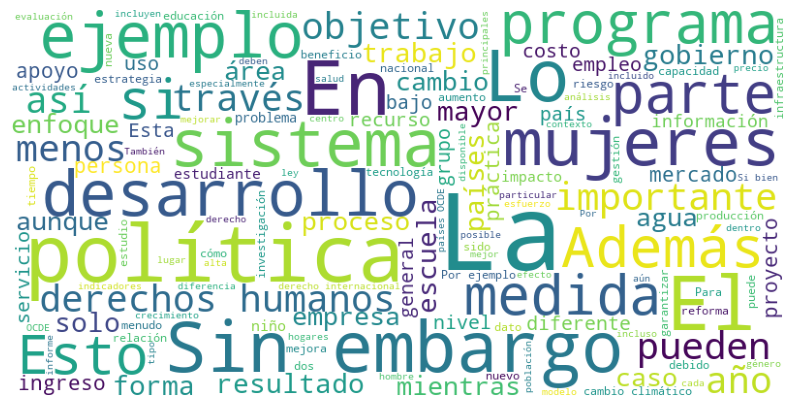

In [19]:
wc_text = ' '.join(word for text in no_stopwords for word in text)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color ='white',
    min_font_size=10,
    max_font_size=110
).generate(wc_text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
stemmer = PorterStemmer()
stemmed = no_stopwords.apply(lambda x: [stemmer.stem(token) for token in x])
stemmed

0       [aprendizaj, educación, consideran, sinónimo, ...
1       [no, dejar, clara, naturaleza, riesgo, pued, d...
2       [como, resultado, mayor, mejorado, acceso, agu...
3       [con, congreso, firmement, control, jurisdicci...
4       [luego, do, seccion, final, analizan, implicac...
                              ...                        
9651    [esto, implica, tiempo, mujer, mercado, labor,...
9652    [sin, embargo, falla, mercado, implican, compe...
9653    [el, hecho, hacerlo, cómo, hacerlo, dependerá,...
9654    [esto, destacó, primer, estudio, caso, marco, ...
9655    [aunqu, existen, programa, convertirs, específ...
Name: textos, Length: 9656, dtype: object

In [22]:
processed = stemmed.apply(lambda x: ' '.join(x))
processed

0       aprendizaj educación consideran sinónimo escol...
1       no dejar clara naturaleza riesgo pued dar luga...
2       como resultado mayor mejorado acceso agua pued...
3       con congreso firmement control jurisdicción re...
4       luego do seccion final analizan implicacion re...
                              ...                        
9651    esto implica tiempo mujer mercado labor ve afe...
9652    sin embargo falla mercado implican competencia...
9653    el hecho hacerlo cómo hacerlo dependerá gran m...
9654    esto destacó primer estudio caso marco institu...
9655    aunqu existen programa convertirs específicame...
Name: textos, Length: 9656, dtype: object

In [ ]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(processed)
x_train